# Modelltraining

In diesem Jupyter Notbook soll ein Deeplearning Modell trainiert werden, dass auf einem Bild einer Straße Fahrspuren erkennen kann:
## Importieren der Bibliotheken

In [1]:
# Funktion zum aufteilen eines Datensatzes in eine Train und einen Test Datensatz
from sklearn.model_selection import train_test_split

In [2]:
#Layer für das Neuronale netz
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, LeakyReLU, ZeroPadding2D, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, SGD #Optimizer für das Neuronale Netz
from tensorflow.keras.losses import SparseCategoricalCrossentropy #loss function
from keras.models import Sequential #Stapel von layern
from tensorflow import keras #Bibliothek zum erstellen und bearbeiten von KI- Modellen
from tensorflow.keras.callbacks import ModelCheckpoint #Methode, die Zwischenspeichern ermöglicht
import tensorflow as tf # Wird benötigt um das Modell ins TF-lite Format zu Konvertieren
import numpy as np #Bibliothek zum laden der Traingsdaten / Labels
import matplotlib.pyplot as plt #Bibliothek zum 
import os #Bibliothek zur Dateiverwaltung
import glob #

## Bereinigung des letzten Durchlaufs

In [3]:
keras.backend.clear_session() #gibt ungenutzten Speicher aus dem letzten training frei

In [4]:
#löscht Chckpoints aus dem letzten Durchlauf
files = glob.glob('./Checkpoints/*')
for f in files:
    os.remove(f)

## Laden der Testdaten und Label

In [5]:
#laden der Daten
#cut_imgs= np.load("processed_imgs/10perc.npy")
cut_imgs=np.load("./processed_imgs/camfullsized_lable1_complete.npz")["imgs"]
#label_resized= np.load("label/ansatz1.npy")
label_resized=np.load("./processed_imgs/camfullsized_lable1_complete.npz")["lable"]

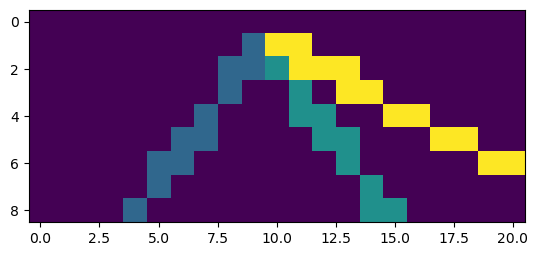

In [6]:
plt.imshow(label_resized[200].reshape(9,21)) # Anzeigen des dazugehörigen Labels

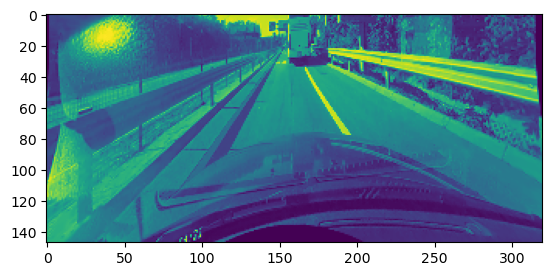

In [7]:
plt.imshow(cut_imgs[200]) #Anzeigen eines Bildes

## Vorbereiten des Trainings

In [8]:
filepath="./Checkpoints/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
#checkpoint speichert das Modell immer zwischen wenn die var_accuracy sich verbessert hat
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max') 
callbacks_list = [checkpoint]


Aufteilen der Daten in Training und Test Daten

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cut_imgs,label_resized,test_size=0.1, random_state=42)

In [10]:
# Speicherplatz freigeben
del cut_imgs
del label_resized

In [11]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(147, 320,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(189, activation='softmax'))

sgd = SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

c:\Users\boby1\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
"""# Anlegen des Modells
model = Sequential()
model.add(Conv2D(32,(5,5), padding='same',activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(189, activation='softmax'))

sgd = SGD(learning_rate=1e-4, decay=1e-3, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer="SGD", metrics=['accuracy'])
#nadam rmsprop"""

'# Anlegen des Modells\nmodel = Sequential()\nmodel.add(Conv2D(32,(5,5), padding=\'same\',activation=\'relu\', input_shape=(X_train.shape[1],X_train.shape[2],1)))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(64, (5,5), padding=\'same\',activation=\'relu\'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(128, (5,5), padding=\'same\',activation=\'relu\'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.1))\n\nmodel.add(Flatten())\nmodel.add(Dense(1024, activation=\'relu\'))\nmodel.add(Dropout(0.10))\nmodel.add(Dense(189, activation=\'softmax\'))\n\nsgd = SGD(learning_rate=1e-4, decay=1e-3, momentum=0.9, nesterov=True)\nmodel.compile(loss=\'binary_crossentropy\', optimizer="SGD", metrics=[\'accuracy\'])\n#nadam rmsprop'

In [13]:
model.summary() # Ausgabe des Modells

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 149, 322, 1)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 147, 320, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 147, 320, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 147, 320, 64)      0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 149, 322, 64)     0         
 ng2D)                                                           
                                                        

In [14]:
# training des Modells (ab iteration 25 parameter abbrechen wenn accuracy <50%)
history = model.fit(X_train[0:3000],y_train[0:3000], batch_size=5, epochs=600,verbose=1,callbacks=callbacks_list, validation_data=(X_test,y_test))

Epoch 1/600
600/600 [==============================] - 115s 184ms/step - loss: 0.6414 - accuracy: 0.0087 - val_loss: 0.7709 - val_accuracy: 0.0108
Epoch 2/600
600/600 [==============================] - 112s 187ms/step - loss: 0.5367 - accuracy: 0.0153 - val_loss: 0.6193 - val_accuracy: 0.0215
Epoch 3/600
600/600 [==============================] - 111s 185ms/step - loss: 0.5129 - accuracy: 0.0260 - val_loss: 0.6023 - val_accuracy: 0.0266
Epoch 4/600
600/600 [==============================] - 116s 193ms/step - loss: 0.4955 - accuracy: 0.0313 - val_loss: 0.5861 - val_accuracy: 0.0322
Epoch 5/600
600/600 [==============================] - 121s 202ms/step - loss: 0.4811 - accuracy: 0.0260 - val_loss: 0.5758 - val_accuracy: 0.0362
Epoch 6/600
600/600 [==============================] - 120s 200ms/step - loss: 0.4677 - accuracy: 0.0350 - val_loss: 0.5664 - val_accuracy: 0.0430
Epoch 7/600
600/600 [==============================] - 124s 206ms/step - loss: 0.4567 - accuracy: 0.0397 - val_loss: 0

In [15]:
# Ausgeben der Trainingsgenauigkeit
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
#Speichern als keras Model
model.save("./models/all_lanes15perc.h5")

## Konvertieren zu einem TF-lite Modell


In [ ]:
# Konvertieren des Modells
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Speichern des Modells
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\boby1\AppData\Local\Temp\tmpgr5j2auo\assets


INFO:tensorflow:Assets written to: C:\Users\boby1\AppData\Local\Temp\tmpgr5j2auo\assets
